In [6]:
from typing import List, Tuple, Callable
import random
try:
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    !pip install -q matplotlib
    import matplotlib.pyplot as plt

In [59]:
class Ant:
    def __init__(self, city: int):
        self.city = city
        self.route = [city]
        
    def explore(self, costs, pheromone, a: float = 1, b: float = 3) -> None:
        n_cities = len(costs)
        # Cidade em que a formiga está
        curr = self.route[-1]
        # Lista as cidades ainda não visitadas
        cities = [city for city in range(n_cities) if city not in self.route]
        while cities:
            # Probabilidades de transicao
            weights = list()
            for city in cities:
                t_ij = pheromone[city][curr]
                n_ij = 1 / costs[city][curr]
                prob_transition = (t_ij**a)*(n_ij**b)  
                                   #sum([(pheromone[city_i][curr]**a)/(costs[city_i][curr]**b) for city_i in cities]))
                weights.append(prob_transition)
            weights = [weight/sum(weights) for weight in weights]
            # Escolha a próxima cidade aleatoriamente com os pesos de probabilidade de transição
            choice = random.choices(cities, weights)[0]
            self.route.append(choice)
            cities.remove(choice)
        # Retorna para a primeira cidade
        self.route.append(self.route[0])


In [60]:
def ant_colony(costs: List[List[int]], epochs: int = 150, evaporation_factor: float = 0.1, q: float = 1):
    
    def path_cost(route: List[List[int]]) -> int:
        """
        Calcula o somatório do custo de cada viagem da rota.
        :param route: Caminho realizado.
        :return: O custo total da rota.
        """
        cost = 0
        for i in range(len(route)-1):
            curr_city = route[i]
            next_city = route[i+1]
            cost += costs[next_city][curr_city]
        return cost
    
    def is_subpath(city_a, city_b, route):
        # Verifica se na rota foi realizada a viagem ab ou ba.
        for i, city in enumerate(route):
            if city_a == city:
                if i == 0:
                    return route[1]==city_b
                elif i == len(route)-1:
                    return route[-2]==city_b
                else:
                    return route[i-1]==city_b or route[i+1]==city_b
                
    n_cities = len(costs)
    cities = [city for city in range(n_cities)]
    # Inicializa os feromônios zerados
    pheromone = [[1 for _ in range(n_cities)] for _ in range(n_cities)]
    ants = list()
    routes = list()
    all_routes = list()
    results = [[],[],[]]
    for _ in range(epochs):
        ants.clear()
        routes.clear()
        # Inicializa uma formiga em cada cidade
        for i in range(n_cities):
            ants.append(Ant(i))
            
        for ant in ants:
            ant.explore(costs, pheromone)
            routes.append(ant.route)
            all_routes.extend(routes)
        
        # atualiza os feromônios
      
        for i in range(n_cities):
            for j in range(n_cities): 
                if i == j:
                    continue
                pheromone[i][j] = (1-evaporation_factor)*pheromone[i][j] + \
                    sum([q/path_cost(route) for route in routes if is_subpath(i, j, route)])
        '''[print(route) for route in routes]
        print('-------')
        [print(row) for row in pheromone]
        print('\n============\n')'''
        
        routes_cost = [path_cost(route) for route in routes]
        #print(min(x), x, round(sum(x)/len(x), 2))
        results[0].append(min(routes_cost))
        results[1].append(max(routes_cost))
        results[2].append(sum(routes_cost)/len(routes_cost))
        
    #[print(i) for i in pheromone]
    return results

In [61]:
PATH_COSTS = [
    [  0,  10,  15,  45,   5,  45,  50,  44,  30, 100,  67,  33,  90,  17,  50],
    [ 15,   0, 100,  30,  20,  25,  80,  45,  41,   5,  45,  10,  90,  10,  35],
    [ 40,  80,   0,  90,  70,  33, 100,  70,  30,  23,  80,  60,  47,  33,  25],
    [100,   8,   5,   0,   5,  40,  21,  20,  35,  14,  55,  35,  21,   5,  40],
    [ 17,  10,  33,  45,   0,  14,  50,  27,  33,  60,  17,  10,  20,  13,  71],
    [ 15,  70,  90,  20,  11,   0,  15,  35,  30,  15,  18,  35,  15,  90,  23],
    [ 25,  19,  18,  30, 100,  55,   0,  70,  55,  41,  55, 100,  18,  14,  18],
    [ 40,  15,  60,  45,  70,  33,  25,   0,  27,  60,  80,  35,  30,  41,  35],
    [ 21,  34,  17,  10,  11,  40,   8,  32,   0,  47,  76,  40,  21,  90,  21],
    [ 35, 100,   5,  18,  43,  25,  14,  30,  39,   0,  17,  35,  15,  13,  40],
    [ 38,  20,  23,  30,   5,  55,  50,  33,  70,  12,   0,  60,  30,  35,  21],
    [ 15,  14,  45,  21, 100,  10,   8,  20,  35,  43,   8,   0,  15, 100,  23],
    [ 80,  10,   5,  20,  35,   8,  90,   5,  44,  10,  80,  14,   0,  25,  80],
    [ 33,  90,  40,  18,  70,  45,  25,  23,  90,  44,  43,  70,   5,   0,  25],
    [ 25,  70,  45,  50,   5,  45,  20, 100,  25,  50,  35,  10,  90,   5,   0]
]

In [58]:
def path_cost(route: List[List[int]], costs) -> int:
        """
        Calcula o somatório do custo de cada viagem da rota.
        :param route: Caminho realizado.
        :return: O custo total da rota.
        """
        cost = 0
        for i in range(len(route)-1):
            curr_city = route[i]
            next_city = route[i+1]
            cost += costs[next_city]
        return cost
path_cost([3, 13, 12, 7, 8, 6, 14, 11, 10, 4, 5, 0, 1, 9, 2], PATH_COSTS)

140

In [26]:
PATH_COSTS = [
    [  0,  10,  15],
    [ 15,   0, 100],
    [ 40,  80,   0]]
results = ant_colony(PATH_COSTS, q=100)

[0, 1, 2, 0]
[1, 0, 2, 1]
[2, 0, 1, 2]
-------
[1, 2.984848484848485, 2.0757575757575757]
[2.984848484848485, 1, 2.3181818181818183]
[2.984848484848485, 2.0757575757575757, 1]


[0, 2, 1, 0]
[1, 0, 2, 1]
[2, 0, 1, 2]
-------
[1, 3.0681818181818183, 3.2803030303030303]
[3.7348484848484844, 1, 2.734848484848485]
[3.7348484848484844, 2.371212121212121, 1]


[0, 1, 2, 0]
[1, 0, 2, 1]
[2, 0, 1, 2]
-------
[1, 4.0189393939393945, 3.215909090909091]
[4.352272727272727, 1, 3.1856060606060606]
[4.352272727272727, 2.7613636363636362, 1]


[0, 1, 2, 0]
[1, 0, 2, 1]
[2, 0, 1, 2]
-------
[1, 4.494318181818182, 3.183712121212121]
[4.660984848484848, 1, 3.4109848484848486]
[4.660984848484848, 2.9564393939393936, 1]


[0, 1, 2, 0]
[1, 2, 0, 1]
[2, 0, 1, 2]
-------
[1, 4.974431818181818, 3.410037878787879]
[4.148674242424242, 1, 4.432765151515151]
[5.0577651515151505, 3.2964015151515147, 1]


[0, 2, 1, 0]
[1, 0, 2, 1]
[2, 0, 1, 2]
-------
[1, 4.062973484848484, 3.9474431818181817]
[4.316761363636363, 1

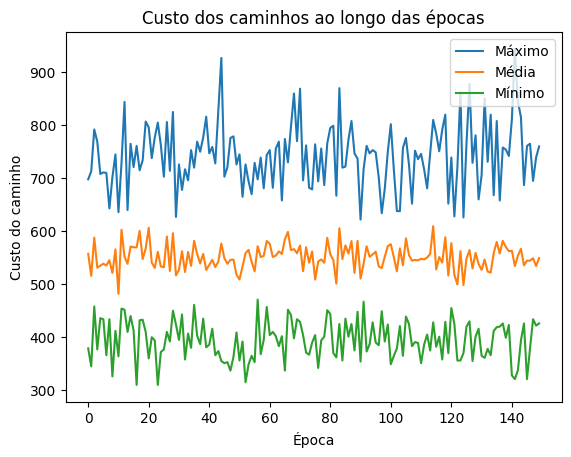

In [62]:
results = ant_colony(PATH_COSTS, q=10)

x = range(len(results[0]))

plt.plot(x, results[1], label='Máximo')
plt.plot(x, results[2], label='Média')
plt.plot(x, results[0], label='Mínimo')
plt.xlabel('Época')
plt.ylabel('Custo do caminho')
plt.title('Custo dos caminhos ao longo das épocas')
plt.legend(loc='upper right')
plt.show()